### Ask: does subselecting for only significant units help with pref not pref decoding?

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.single_selected_feature_configs import *
import scipy
import argparse
import copy

Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


Text(0.5, 1.0, 'Decoding with full population')

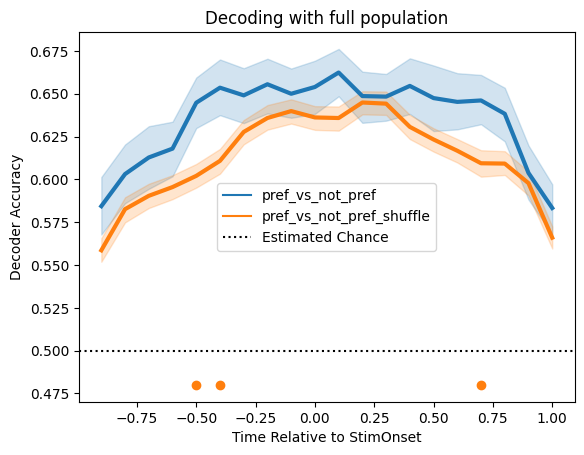

In [2]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref_vs_not_pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")
ax.set_title("Decoding with full population")


Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


Text(0.5, 1.0, 'Decoding with preference-selective population (p < 0.05)')

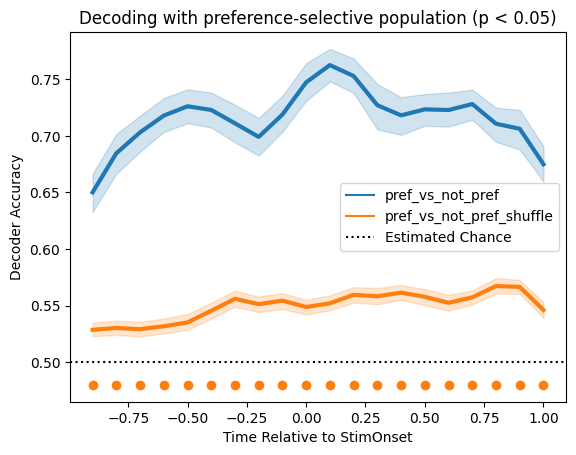

In [3]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref_vs_not_pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")
ax.set_title("Decoding with preference-selective population (p < 0.05)")


### What do they look like per-feature?

<Axes: xlabel='Time', ylabel='Accuracy'>

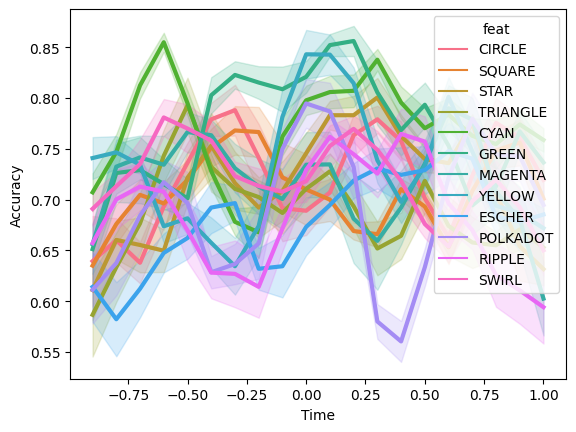

In [4]:
sub_res = res[~res.condition.str.contains("shuffle")]
fig, ax = plt.subplots()
sns.lineplot(sub_res, x="Time", y="Accuracy", hue="feat", errorbar="se", linewidth=3, ax=ax)

Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


Text(0.5, 1.0, 'Decoding with preference-selective population (p < 0.05)')

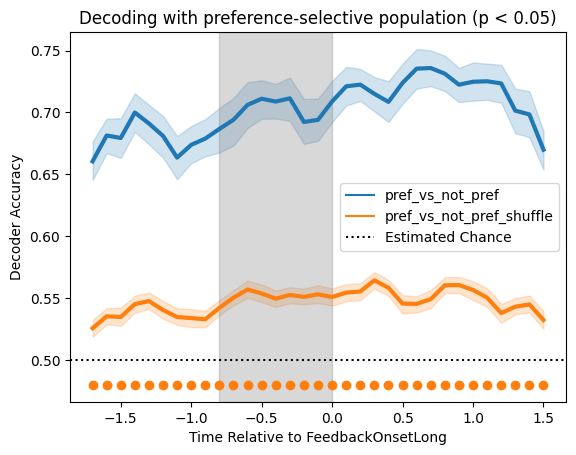

In [5]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.trial_event = "FeedbackOnsetLong"

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref_vs_not_pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")
ax.set_title("Decoding with preference-selective population (p < 0.05)")


<Axes: xlabel='Time', ylabel='Accuracy'>

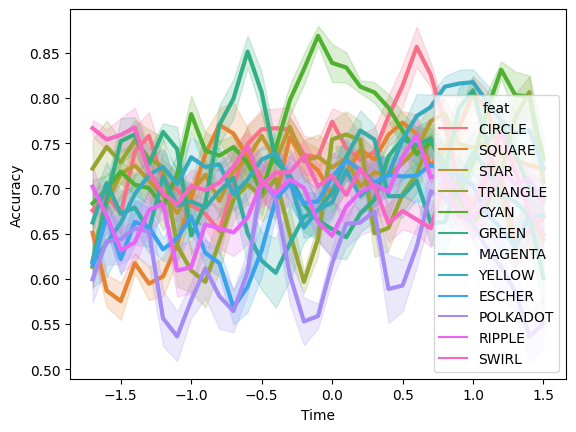

In [6]:
sub_res = res[~res.condition.str.contains("shuffle")]
fig, ax = plt.subplots()
sns.lineplot(sub_res, x="Time", y="Accuracy", hue="feat", errorbar="se", linewidth=3, ax=ax)

Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


<Axes: xlabel='TestTime', ylabel='TrainTime'>

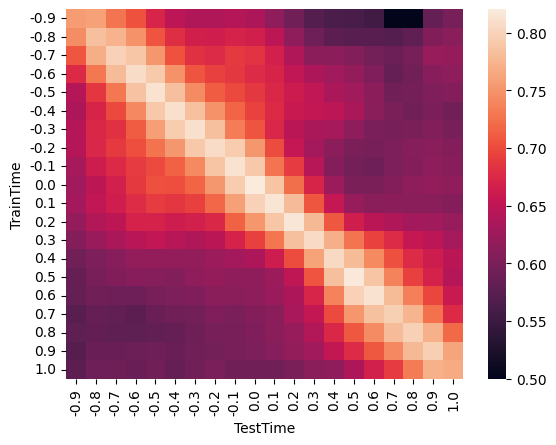

In [7]:
fig, ax = plt.subplots()
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "StimOnset"
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.condition = "pref_vs_not_pref"

shuffles = io_utils.read_selected_features(copy.deepcopy(args), FEATURES, [args.condition])
shuffle_means = shuffles[shuffles.condition.isin(["pref_vs_not_pref_shuffle"])].groupby(["Time", "condition"]).Accuracy.mean().reset_index(name="ShuffleAccuracy")

res = io_utils.read_selected_features_cross_time(args, FEATURES, "pref_vs_not_pref", avg=True)
res = pd.merge(res, shuffle_means, left_on="TestTime", right_on="Time")
res["Accuracy"] = res.apply(lambda x: 0.5 if x.Accuracy < x.ShuffleAccuracy else x.Accuracy, axis=1)

pivoted = res.pivot(index="TrainTime", columns="TestTime", values="Accuracy")
sns.heatmap(pivoted, ax=ax, vmin=0.5)
# sns.heatmap(pivoted, ax=ax)

In [8]:
res

,TrainTime,TestTime,Accuracy,Time,condition,ShuffleAccuracy
0,-0.9,-0.9,0.755469,-0.9,pref_vs_not_pref_shuffle,0.528680
1,-0.8,-0.9,0.744766,-0.9,pref_vs_not_pref_shuffle,0.528680
2,-0.7,-0.9,0.707057,-0.9,pref_vs_not_pref_shuffle,0.528680
3,-0.6,-0.9,0.675807,-0.9,pref_vs_not_pref_shuffle,0.528680
4,-0.5,-0.9,0.642135,-0.9,pref_vs_not_pref_shuffle,0.528680
...,...,...,...,...,...,...
395,0.6,1.0,0.658047,1.0,pref_vs_not_pref_shuffle,0.546175
396,0.7,1.0,0.676042,1.0,pref_vs_not_pref_shuffle,0.546175
397,0.8,1.0,0.719557,1.0,pref_vs_not_pref_shuffle,0.546175
398,0.9,1.0,0.762083,1.0,pref_vs_not_pref_shuffle,0.546175


Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


<Axes: xlabel='TestTime', ylabel='TrainTime'>

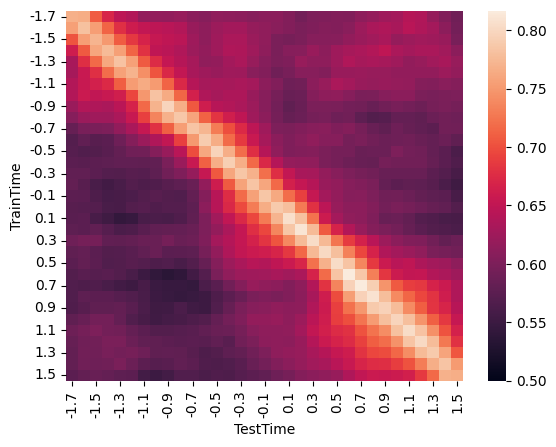

In [9]:
fig, ax = plt.subplots()
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.condition = "pref_vs_not_pref"

shuffles = io_utils.read_selected_features(copy.deepcopy(args), FEATURES, [args.condition])
shuffle_means = shuffles[shuffles.condition.isin(["pref_vs_not_pref_shuffle"])].groupby(["Time", "condition"]).Accuracy.mean().reset_index(name="ShuffleAccuracy")

res = io_utils.read_selected_features_cross_time(args, FEATURES, "pref_vs_not_pref", avg=True)
res = pd.merge(res, shuffle_means, left_on="TestTime", right_on="Time")
res["Accuracy"] = res.apply(lambda x: 0.5 if x.Accuracy < x.ShuffleAccuracy else x.Accuracy, axis=1)

res = io_utils.read_selected_features_cross_time(args, FEATURES, "pref_vs_not_pref", avg=True)
pivoted = res.pivot(index="TrainTime", columns="TestTime", values="Accuracy")
sns.heatmap(pivoted, ax=ax, vmin=0.5)

### Chosen, pref, not pref for FeedbackOnsetLong

Warning, shuffle not found: MAGENTA_chosen_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_chosen_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_chosen_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_shuffle_9


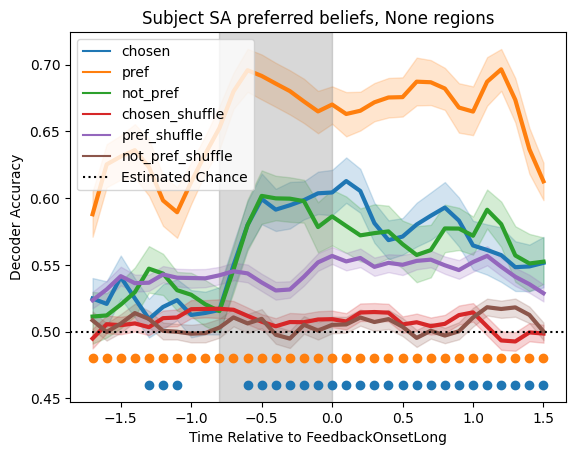

In [2]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.trial_event = "FeedbackOnsetLong"

res = io_utils.read_selected_features(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")